In [558]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [559]:
user_engagement_user_id = pd.read_csv("../relax_challenge/takehome_user_engagement.csv", parse_dates=['time_stamp'], index_col=[1, 0])
takehome_users = pd.read_csv("../relax_challenge/takehome_users.csv", encoding = "ISO-8859-1")

#I get an error reading takehome_users ?

In [560]:
user_engagement_user_id.head()

visited
user_id time_stamp                  
1       2014-04-22 03:53:30        1
2       2013-11-15 03:45:04        1
        2013-11-29 03:45:04        1
        2013-12-09 03:45:04        1
        2013-12-25 03:45:04        1

In [561]:
user_engagement.dtypes

time_stamp    datetime64[ns]
user_id                int64
visited                int64
dtype: object

In [562]:
user_engagement = pd.read_csv("../relax_challenge/takehome_user_engagement.csv")

user_engagement['time_stamp'] = pd.to_datetime(user_engagement['time_stamp'])

In [563]:
user_engagement.dtypes

time_stamp    datetime64[ns]
user_id                int64
visited                int64
dtype: object

In [564]:
takehome_users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [565]:
engagement_sort = user_engagement['user_id'].sort_values()

adopted_user_count = engagement_sort.value_counts()
adopted_user_count = adopted_user_count.rename_axis("user_id").reset_index(name = "total_vists")

In [566]:
adopted_user_count.head(10)

,user_id,total_vists
0,3623,606
1,906,600
2,1811,593
3,7590,590
4,8068,585
5,9402,581
6,4022,580
7,3269,566
8,9312,547
9,7210,545


In [567]:
adopted_user_count = adopted_user_count.rename(columns={'user_id': 'object_id'})

In [568]:
adopted_user_count.head()

,object_id,total_vists
0,3623,606
1,906,600
2,1811,593
3,7590,590
4,8068,585


In [569]:
take_home_users = pd.merge(takehome_users, adopted_user_count, on='object_id')

In [570]:
take_home_users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,total_vists
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,1
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,14
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,1
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,1
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,1


adopted user if user log on, 3 days or more out of 7 days.

In [571]:
engagement_week = user_engagement_user_id.groupby(level=0).resample('7D', level=1).sum().dropna()

In [572]:
engagement_week.head()

visited
user_id time_stamp         
1       2014-04-22        1
2       2013-11-15        1
        2013-11-22        0
        2013-11-29        1
        2013-12-06        1

In [573]:
engagement_week['adopted_user'] = ""

engagement_week.adopted_user = engagement_week['visited'] >= 3

In [574]:
engagement_week.head()

visited  adopted_user
user_id time_stamp                       
1       2014-04-22        1         False
2       2013-11-15        1         False
        2013-11-22        0         False
        2013-11-29        1         False
        2013-12-06        1         False

In [575]:
engagement_week.loc[engagement_week['adopted_user'] == True, 'adopted'] = 'True' 

In [576]:
engagement_week.head()

visited  adopted_user adopted
user_id time_stamp                               
1       2014-04-22        1         False     NaN
2       2013-11-15        1         False     NaN
        2013-11-22        0         False     NaN
        2013-11-29        1         False     NaN
        2013-12-06        1         False     NaN

In [577]:
engagement_week.dtypes

visited          int64
adopted_user      bool
adopted         object
dtype: object

In [578]:
#engagement_week['visited'] = engagement_week['visited'].to_string
#engagement_week['adopted_user'] = engagement_week['adopted_user'].to_string

In [579]:
#engagement_week = engagement_week.reset_index()

In [580]:
#engagement_week['user_id'] = engagement_week.index

In [581]:
#engagement_week.reset_index(level=0, drop=True, inplace=True)

In [582]:
engagement_week = engagement_week[engagement_week.adopted_user != False]

In [583]:
engagement_week.head()

visited  adopted_user adopted
user_id time_stamp                               
2       2014-02-07        3          True    True
10      2013-02-13        3          True    True
        2013-02-27        3          True    True
        2013-03-20        3          True    True
        2013-04-10        3          True    True

In [584]:
engagement_week = engagement_week.reset_index()

In [585]:
engagement_week.head()

,user_id,time_stamp,visited,adopted_user,adopted
0,2,2014-02-07,3,True,True
1,10,2013-02-13,3,True,True
2,10,2013-02-27,3,True,True
3,10,2013-03-20,3,True,True
4,10,2013-04-10,3,True,True


In [586]:
engagement_week = engagement_week.drop_duplicates(subset='user_id')

In [587]:
engagement_week.drop(["adopted", "visited", "time_stamp"], axis = 1).head()

,user_id,adopted_user
0,2,True
1,10,True
54,20,True
55,42,True
121,43,True


In [588]:
engagement_week = engagement_week.rename(columns={'user_id': 'object_id'})

In [589]:
#take_home_users = pd.merge(takehome_users, engagement_week, on='object_id', sort = False)

In [590]:
#take_home_users.head()

In [591]:
#merged_left = pd.merge(left=takehome_users, right=engagement_week, how='right', left_on='object_id', right_on='object_id')

In [592]:
#take_home_users.head()

In [593]:
take_home_users = take_home_users.merge(engagement_week,how='left', left_on='object_id', right_on='object_id')

In [594]:
take_home_users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,total_vists,time_stamp,visited,adopted_user,adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,1,NaT,NaN,NaN,NaN
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,14,2014-02-07,3.0,True,True
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,1,NaT,NaN,NaN,NaN
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,1,NaT,NaN,NaN,NaN
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,1,NaT,NaN,NaN,NaN


In [597]:
take_home_users = take_home_users.drop(["time_stamp", "visited", "adopted"], axis = 1)

In [599]:
take_home_users['adopted_user'].fillna(False, inplace = True)

In [600]:
take_home_users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,total_vists,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,1,False
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,14,True
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,1,False
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,1,False
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,1,False


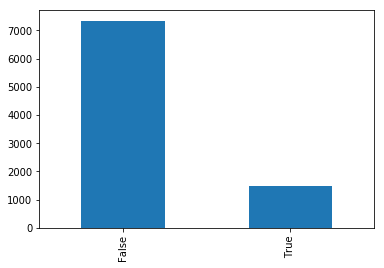

In [606]:
take_home_users.adopted_user.value_counts().plot(kind = "bar")

In [607]:
take_home_users.corr(method ='pearson') 

,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,total_vists,adopted_user
object_id,1.000000,0.015238,-0.034920,-0.028916,0.002285,0.016570,-0.009793,-0.000504
last_session_creation_time,0.015238,1.000000,0.006590,0.008035,0.042203,0.011874,0.328796,0.403586
opted_in_to_mailing_list,-0.034920,0.006590,1.000000,0.488219,-0.002421,0.011821,0.004284,0.009534
enabled_for_marketing_drip,-0.028916,0.008035,0.488219,1.000000,0.000538,-0.005592,0.002257,0.002771
org_id,0.002285,0.042203,-0.002421,0.000538,1.000000,-0.064804,0.055777,0.073454
invited_by_user_id,0.016570,0.011874,0.011821,-0.005592,-0.064804,1.000000,-0.000796,0.010278
total_vists,-0.009793,0.328796,0.004284,0.002257,0.055777,-0.000796,1.000000,0.665060
adopted_user,-0.000504,0.403586,0.009534,0.002771,0.073454,0.010278,0.665060,1.000000


Correlations for users if they're an adopted user is the last creation time, and the total number of visits